In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
df1 = pd.read_csv('fashion-mnist_train.csv')
df2=pd.read_csv('fashion-mnist_test.csv')

In [19]:
y_train = df1.iloc[0:, 0].values.reshape(-1, 1) #starting from 1st row because csv first row is column names
y_test = df2.iloc[0:, 0].values.reshape(-1, 1)

In [20]:
X_train = df1.iloc[0:, 1:].values.T
X_train = X_train.astype(float) / 255.0

X_test = df2.iloc[0:, 1:].values.T
X_test = X_test.astype(float) / 255.0

In [21]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # For Hidden Neurons
        self.w1 = np.random.randn(hidden_size, input_size)*0.01
        self.b1 = np.zeros((hidden_size, 1))

        # For Output Neurons
        self.w2 = np.random.randn(output_size, hidden_size)*0.01
        self.b2 = np.zeros((output_size, 1))


    def one_hot(self,Y):
        
        one_hot_Y = np.eye(10)[Y.flatten()]
        one_hot_Y=one_hot_Y.T
        return one_hot_Y


    def activation(self,x,alpha=00.1): #tanh
        # return np.tanh(x)
        return np.maximum(0, x)
        # return np.maximum(alpha * x, x)
    
    def activation_deriv(self,x,alpha=00.1):
        # tanh_x = self.activation(x)
        # return 1 - tanh_x**2

        return x>0
        
        # dx = np.ones_like(x)
        # dx[x < 0] = alpha
        # return dx
        

    def softmax(self, x):
        ex = np.exp(x)  
        return ex / np.sum(ex, axis=0)
        
    
    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(self.w1, X) + self.b1 #Z corresponds to pre activation value
        self.a1 = self.activation(self.z1) #a corresponds to activation value

        self.z2 = np.dot(self.w2,self.a1 ) + self.b2 #Z corresponds to pre activation value

        self.a2 = self.softmax(self.z2)#a corresponds to activation value
        return self.a2

    def compute_loss(self, y, y_pred):
        m = y.shape[1]
        cost = -(1/m)*np.sum(y*np.log(y_pred))
        return cost

    def backward(self, X, y_true, learning_rate):

        m = X.shape[1]

        self.dz2 = (self.a2 - y_true) #derivative of soft max 
        self.dw2 = (1/m)*np.dot(self.dz2,self.a1.T )
        self.db2 = (1/m)*np.sum(self.dz2,axis=1,keepdims=True)


        self.dz1 = (1/m) * np.dot(self.w2.T, self.dz2) * self.activation_deriv(self.z1) #derivative of activation
        self.dw1 = (1/m)*np.dot(self.dz1,X.T )
        self.db1 = (1/m)*np.sum(self.dz1,axis=1,keepdims=True)

        self.w2 = self.w2 - learning_rate*self.dw2
        self.b2 = self.b2 - learning_rate*self.db2
        

        self.w1 = self.w1 - learning_rate*self.dw1
        self.b1 = self.b1 - learning_rate*self.db1


 
    def train(self, X, y, epochs, learning_rate):
        y=self.one_hot(y)
        loss_list=[]
        for epoch in range(epochs):
            predictions = self.forward(X)
            loss = self.compute_loss(y, predictions)
            self.backward(X, y, learning_rate)
            loss_list.append(loss)
            if(epoch%10==0):
                print(f"Epoch {epoch}, Loss: {loss}")
        plt.plot(range(1, len(loss_list) + 1), loss_list, marker='X')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.title('Cost vs Epoch')
        plt.show()

    def predict(self, X):
        return self.forward(X)

Epoch 0, Loss: 2.3000530797864305
Epoch 10, Loss: 1.833825965639236
Epoch 20, Loss: 1.55980497698364
Epoch 30, Loss: 1.3817779068073421
Epoch 40, Loss: 1.2583379031947806
Epoch 50, Loss: 1.1680726016292935
Epoch 60, Loss: 1.099256953188514
Epoch 70, Loss: 1.0450373159840562
Epoch 80, Loss: 1.0011707572054434
Epoch 90, Loss: 0.9649012413971233
Epoch 100, Loss: 0.9343653893271511
Epoch 110, Loss: 0.9082603676269313
Epoch 120, Loss: 0.8856489884518431
Epoch 130, Loss: 0.865840556702911
Epoch 140, Loss: 0.8483152720446382
Epoch 150, Loss: 0.832674705276642
Epoch 160, Loss: 0.8186084734566612
Epoch 170, Loss: 0.8058712889501726
Epoch 180, Loss: 0.7942668529485513
Epoch 190, Loss: 0.7836361957551838
Epoch 200, Loss: 0.7738492352022219
Epoch 210, Loss: 0.7647985496744563
Epoch 220, Loss: 0.7563946162373131
Epoch 230, Loss: 0.748562215517365
Epoch 240, Loss: 0.741237702748683
Epoch 250, Loss: 0.7343668618349563
Epoch 260, Loss: 0.7279031777886282
Epoch 270, Loss: 0.7218065283156104
Epoch 280, 

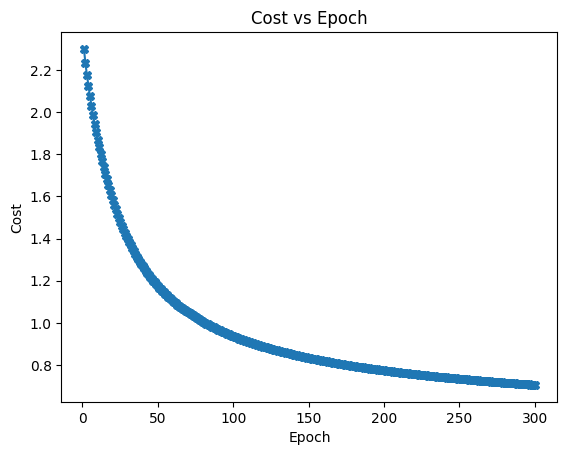

In [39]:
input_size = X_train.shape[0]
hidden_size = 750
output_size = 10    

nn = NeuralNetwork(input_size, hidden_size, output_size)

nn.train(X_train, y_train, epochs=300,learning_rate=0.9)

In [40]:
test_predictions = nn.forward(X_test)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(test_predictions, axis=0)

# Calculate accuracy
correct_predictions = np.sum(predicted_labels.reshape(-1, 1) == y_test)
accuracy = correct_predictions / len(predicted_labels.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.31%


In [41]:
train_predictions = nn.forward(X_train)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(train_predictions, axis=0)

# Calculate accuracy
correct_predictions = np.sum(predicted_labels.reshape(-1, 1) == y_train)
accuracy = correct_predictions / len(predicted_labels.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.38%
